## 1. Make classificaiton data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles


In [2]:
# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of x:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of x:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


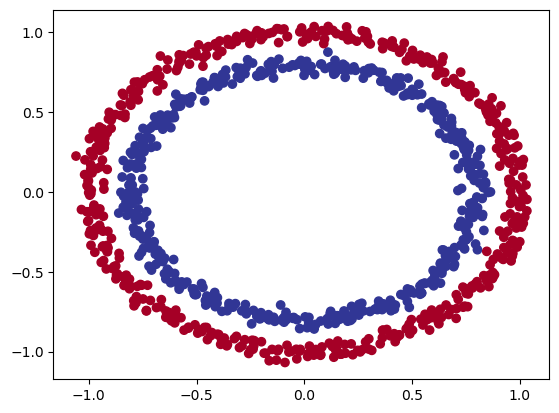

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# view example of features and labels
x_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X:{x_sample} and the same for y:{y_sample}")
print(f"Values for one sample of X:{x_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] and the same for y:1
Values for one sample of X:(2,) and the same for y:()


## 1.2 Turn data into tensors and create train and test splits

In [9]:
import torch
torch.__version__

'2.3.0'

In [10]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
type(X), X.dtype

(torch.Tensor, torch.float32)

In [12]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
# Split data into training  and test sets
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X , y , test_size= 0.2 , random_state=42) 

In [14]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [15]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [16]:
len(X_train), len(X_test)

(800, 200)

## 2. Building a model

build a model to classify blue and red dots.
We want to:
1. Setup device code to run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [17]:
# Import PyTorch and nn
import torch
from torch import nn 

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [19]:
X_train.shape

torch.Size([800, 2])

In [20]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

1. subclasses `nn.Module`
2. Create `nn.linear()` handle the shapes of our data
3. Defines a `forward()` forward pass of the model
4. Instatiate instance of our model and send it to the target `device`

In [21]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes 2 feature and upscale to 5
        #self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2 ,out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )
        
    def forward(self,x):
        return self.two_linear_layers(x)
    
model_0 = CircleModelV0().to(device)
model_0        

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [22]:
next(model_0.parameters()).device

device(type='cpu')

In [23]:
model_0 = nn.Sequential(nn.Linear(in_features=2 , out_features=5), nn.Linear(in_features=5 , out_features=1)).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2747,  0.4288],
                      [ 0.0547,  0.6769],
                      [ 0.4768,  0.2769],
                      [-0.4579, -0.6346],
                      [-0.1560, -0.5070]])),
             ('0.bias', tensor([-0.1219, -0.1845, -0.3359, -0.2181, -0.5114])),
             ('1.weight',
              tensor([[-0.3299, -0.0865,  0.1046, -0.1773, -0.0524]])),
             ('1.bias', tensor([-0.3170]))])

In [25]:
X_test.dtype

torch.float32

In [26]:
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.2688],
        [-0.2606],
        [-0.2512],
        [-0.2739],
        [-0.1890],
        [-0.1845],
        [-0.2106],
        [-0.1926],
        [-0.2539],
        [-0.2593]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [27]:
untrained_preds[:10]

tensor([[-0.2688],
        [-0.2606],
        [-0.2512],
        [-0.2739],
        [-0.1890],
        [-0.1845],
        [-0.2106],
        [-0.1926],
        [-0.2539],
        [-0.2593]], grad_fn=<SliceBackward0>)

In [28]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [29]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [30]:
def accuracy_fn(y_true , y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) *100
    return acc
    

In [31]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2688],
        [-0.2606],
        [-0.2512],
        [-0.2739],
        [-0.1890]])

In [32]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [33]:
y_pred_porbs = torch.sigmoid(y_logits)
y_pred_porbs

tensor([[0.4332],
        [0.4352],
        [0.4375],
        [0.4319],
        [0.4529]])

In [34]:
torch.round(y_pred_porbs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [35]:
y_preds = torch.round(y_pred_porbs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [36]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building training and testing loop

In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train  =X_train.to(device), y_train.to(device)
X_test, y_test  =X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_0.train()
    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    #2.Calculate loss / accuracy
    #loss = loss_fn(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits,
                  y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. loss backward
    loss.backward()
    
    #5. Optimizer step
    optimizer.step()
    
    ##Testing 
    model_0.eval()
    
    with torch.inference_mode():
        #1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #2. Calculate test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
        
    if epoch % 10 ==0:
        print(f"Epoch:{epoch}| Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc:{test_acc:.2f}%")

Epoch:0| Loss: 0.69997, Acc: 50.00% | Test loss: 0.69929, Test acc:50.00%
Epoch:10| Loss: 0.69610, Acc: 50.00% | Test loss: 0.69606, Test acc:50.00%
Epoch:20| Loss: 0.69439, Acc: 50.00% | Test loss: 0.69478, Test acc:50.00%
Epoch:30| Loss: 0.69364, Acc: 50.00% | Test loss: 0.69433, Test acc:50.00%
Epoch:40| Loss: 0.69331, Acc: 41.50% | Test loss: 0.69421, Test acc:42.00%
Epoch:50| Loss: 0.69317, Acc: 47.25% | Test loss: 0.69423, Test acc:49.00%
Epoch:60| Loss: 0.69310, Acc: 48.88% | Test loss: 0.69429, Test acc:49.50%
Epoch:70| Loss: 0.69307, Acc: 49.00% | Test loss: 0.69435, Test acc:49.50%
Epoch:80| Loss: 0.69305, Acc: 49.88% | Test loss: 0.69441, Test acc:48.50%
Epoch:90| Loss: 0.69304, Acc: 50.12% | Test loss: 0.69446, Test acc:48.50%


### 4. Make predictions and evaluate model

In [38]:
'''
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
    print("helper_functions.py already exists, skipping download")
    print("helper already exist and skip download")
    
else:
    print("Download helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)
        
    from helper_functions import plot_predictions, plot_decision_boundary
    '''

import numpy as np 
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


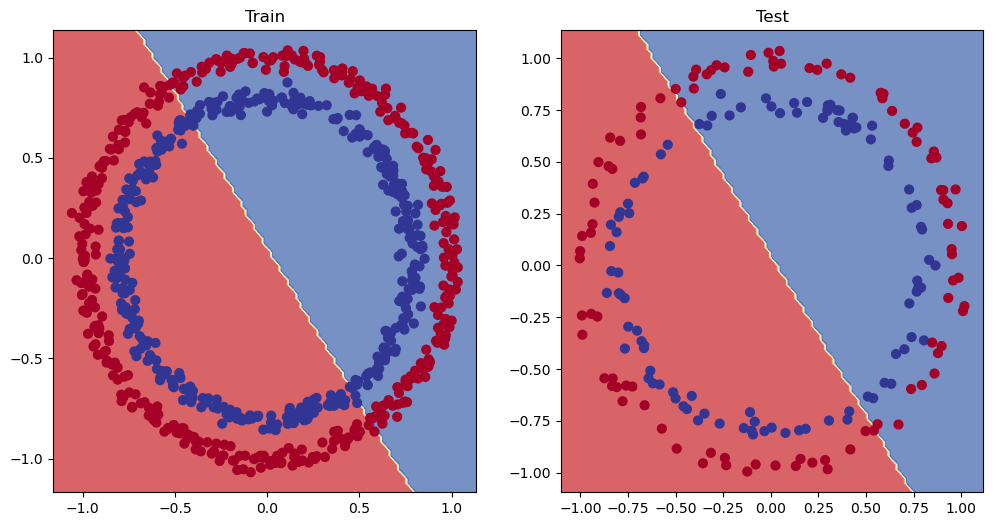

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5. Improve the model

* Add more layers 
* Add more hidden units
* Fit for longer
* changing the activation function
* changing learning rate
* change loss function

In [40]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2837,  0.4151],
                      [ 0.0571,  0.6732],
                      [ 0.4749,  0.2799],
                      [-0.4522, -0.6430],
                      [-0.1529, -0.5114]])),
             ('0.bias', tensor([-0.1668, -0.1967, -0.3247, -0.2446, -0.5237])),
             ('1.weight',
              tensor([[-0.3393, -0.0860,  0.0591, -0.2222, -0.1384]])),
             ('1.bias', tensor([-0.1828]))])

In [41]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2 , out_features= 10)
        self.layer_2 = nn.Linear(in_features= 10 , out_features= 10)
        self.layer_3 = nn.Linear(in_features=10 , out_features= 1)
        
    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [42]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [44]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1)


In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
for epoch in range(epochs):
    ### Training 
    model_1.train()
    #1. forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #2. Calculate loss /acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true= y_train,
                      y_pred=y_pred)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. lOSS BACKWARD
    loss.backward()
    
    #5.optimizer step
    
    optimizer.step()
    
    ###
    model_1.eval()
    with torch.inference_mode():
        #1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2. Calculate loss
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    # Printingggg
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss {loss:.5f}, Acc{acc:.2f}% | Test_loss: {test_loss:.5f}, Test_acc: {test_acc:.2f}%")
    

Epoch:0 | Loss 0.69396, Acc50.88% | Test_loss: 0.69261, Test_acc: 51.00%
Epoch:100 | Loss 0.69305, Acc50.38% | Test_loss: 0.69379, Test_acc: 48.00%
Epoch:200 | Loss 0.69299, Acc51.12% | Test_loss: 0.69437, Test_acc: 46.00%
Epoch:300 | Loss 0.69298, Acc51.62% | Test_loss: 0.69458, Test_acc: 45.00%
Epoch:400 | Loss 0.69298, Acc51.12% | Test_loss: 0.69465, Test_acc: 46.00%
Epoch:500 | Loss 0.69298, Acc51.00% | Test_loss: 0.69467, Test_acc: 46.00%
Epoch:600 | Loss 0.69298, Acc51.00% | Test_loss: 0.69468, Test_acc: 46.00%
Epoch:700 | Loss 0.69298, Acc51.00% | Test_loss: 0.69468, Test_acc: 46.00%
Epoch:800 | Loss 0.69298, Acc51.00% | Test_loss: 0.69468, Test_acc: 46.00%
Epoch:900 | Loss 0.69298, Acc51.00% | Test_loss: 0.69468, Test_acc: 46.00%


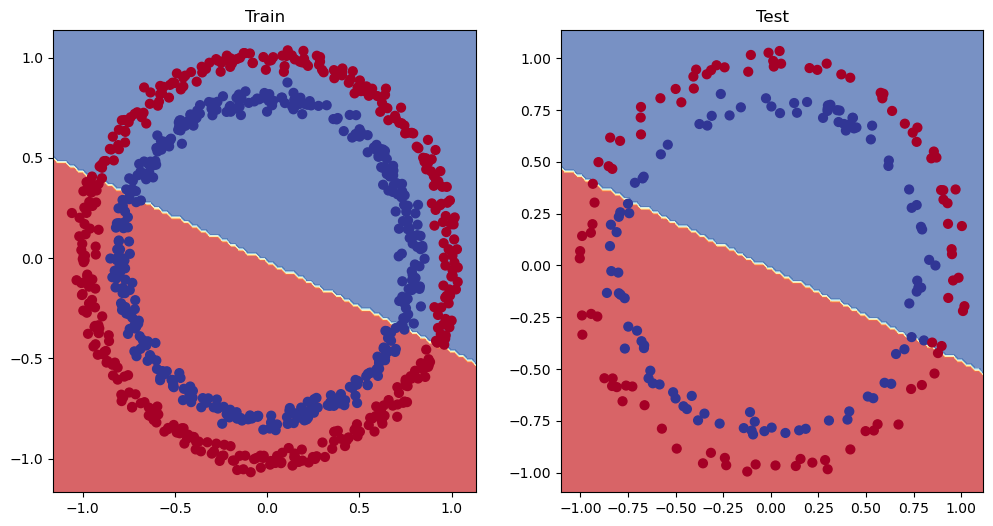

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line
One way to troubleshoot is to test large problem into small problem

In [47]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [48]:
train_split  = int(0.8 * len(X_regression))
X_train_regression, y_train_regression =  X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression =  X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(X_test_regression)

(80, 20)

In [49]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
    print("helper_functions.py already exists, skipping download")
    print("helper already exist and skip download")
    
else:
    print("Download helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)
        
    from helper_functions import plot_predictions, plot_decision_boundary


Download helper_function.py


c:\Users\aelsha33\AppData\Local\anaconda3\envs\ML\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


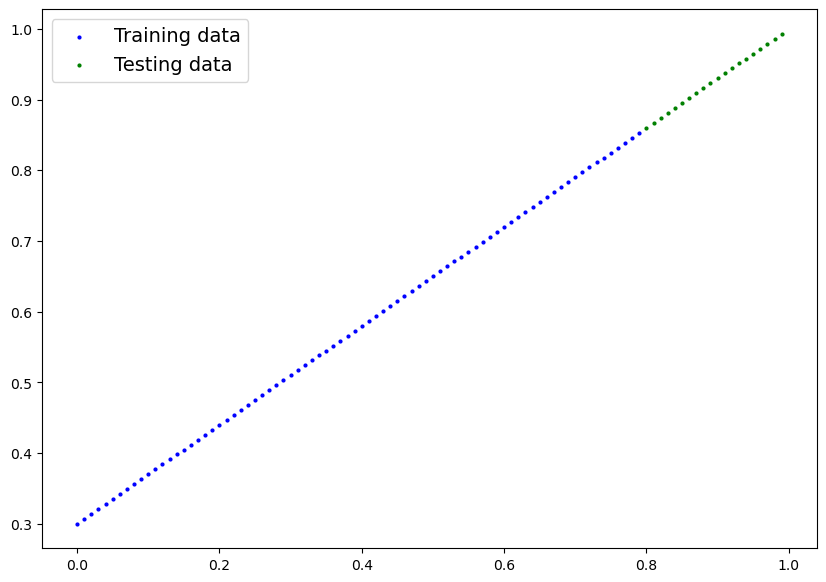

In [50]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [51]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10 , out_features=10),
    nn.Linear(in_features= 10 , out_features= 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [52]:
#Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [53]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss {loss:.5f}, Acc{acc:.2f}% | Test_loss: {test_loss:.5f}, Test_acc: {test_acc:.2f}%")
    

Epoch:0 | Loss 0.75986, Acc51.00% | Test_loss: 0.91103, Test_acc: 46.00%
Epoch:100 | Loss 0.02858, Acc51.00% | Test_loss: 0.00081, Test_acc: 46.00%
Epoch:200 | Loss 0.02533, Acc51.00% | Test_loss: 0.00209, Test_acc: 46.00%
Epoch:300 | Loss 0.02137, Acc51.00% | Test_loss: 0.00305, Test_acc: 46.00%
Epoch:400 | Loss 0.01964, Acc51.00% | Test_loss: 0.00341, Test_acc: 46.00%
Epoch:500 | Loss 0.01940, Acc51.00% | Test_loss: 0.00387, Test_acc: 46.00%
Epoch:600 | Loss 0.01903, Acc51.00% | Test_loss: 0.00379, Test_acc: 46.00%
Epoch:700 | Loss 0.01878, Acc51.00% | Test_loss: 0.00381, Test_acc: 46.00%
Epoch:800 | Loss 0.01840, Acc51.00% | Test_loss: 0.00329, Test_acc: 46.00%
Epoch:900 | Loss 0.01798, Acc51.00% | Test_loss: 0.00360, Test_acc: 46.00%


In [54]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)


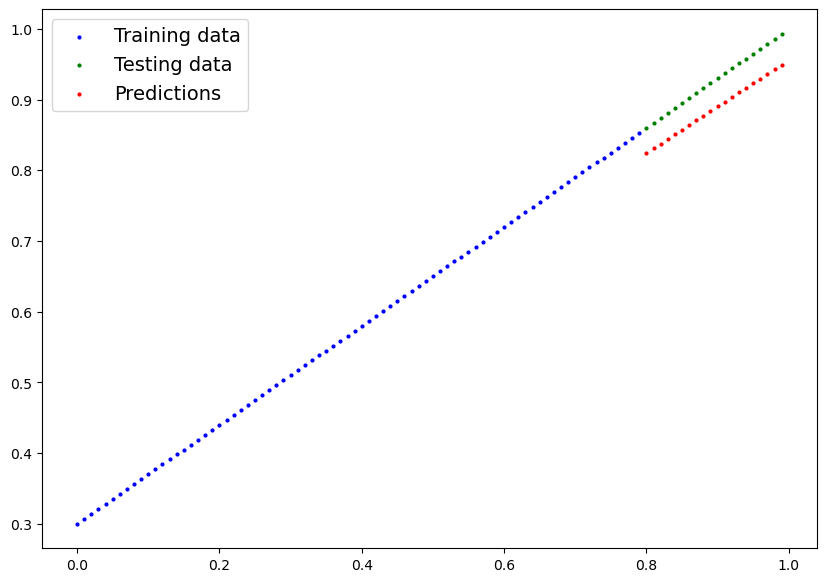

In [55]:
    
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions= y_preds)

### 6. The missing piece: non-linearity


### 6.1 Recreating non-linear data (red and blue circles)

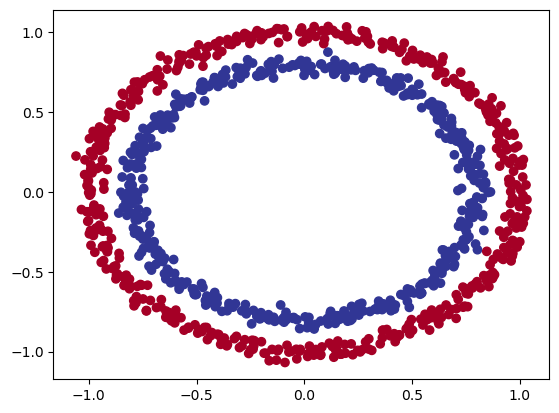

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, 
                   noise=0.03 , 
                   random_state=42)

plt.scatter(X[:,0], X[:,1], c=y , cmap=plt.cm.RdYlBu)

In [57]:
#Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
#X = torch.from_numpy(X).type(torch.float)
#y = torch.from_numpy(y).type(torch.float)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]

(array([[ 0.65794626, -0.46508097],
        [ 0.63194897, -0.7346633 ],
        [-1.00861631, -0.12403051],
        [-0.96657519, -0.22562157],
        [-0.16659009,  0.79944645]]),
 array([1, 0, 0, 0, 1], dtype=int64))

##6.2 Building a model with a non-linearity


In [58]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2 , out_features= 10)
        self.layer_2 = nn.Linear(in_features=10 , out_features= 10)
        self.layer_3 = nn.Linear(in_features=10 , out_features= 1)
        self.Relu = nn.ReLU()
        #self.sigmoid = nn.sigmoid()
    def forward(self, x):
        return self.layer_3(self.Relu(self.layer_2(self.Relu(self.layer_1(x)))))
    
model_3 = CircleModelV2().to(device)
model_3
          

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (Relu): ReLU()
)

In [59]:
#Loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [95]:
X_train,y_train=torch.as_tensor(X_train),torch.torch.as_tensor(y_train)

In [96]:
X_test,y_test=torch.as_tensor(X_test),torch.as_tensor(y_test)

## 6.3 Training a model with non-linearity

In [99]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
epochs = 1000
for epoch in range(epochs):
    ### Training 
    model_3.train()
    #1. forward pass
    X_test = X_test.float()
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #2. Calculate loss /acc
    y_train = y_train.float()
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true= y_train,
                      y_pred=y_pred)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. lOSS BACKWARD
    loss.backward()
    
    #5.optimizer step
    
    optimizer.step()
    
    ###
    model_3.eval()
    with torch.inference_mode():
        #1. Forward pass
        y_test = y_test.float()
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2. Calculate loss
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    # Printingggg
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss {loss:.5f}, Acc{acc:.2f}% | Test_loss: {test_loss:.5f}, Test_acc: {test_acc:.2f}%")
    

Epoch:0 | Loss 0.69279, Acc50.00% | Test_loss: 0.69299, Test_acc: 50.00%
Epoch:100 | Loss 0.69111, Acc53.00% | Test_loss: 0.69098, Test_acc: 53.00%
Epoch:200 | Loss 0.68973, Acc53.62% | Test_loss: 0.68934, Test_acc: 55.50%
Epoch:300 | Loss 0.68788, Acc53.00% | Test_loss: 0.68716, Test_acc: 56.00%
Epoch:400 | Loss 0.68506, Acc52.88% | Test_loss: 0.68400, Test_acc: 56.50%
Epoch:500 | Loss 0.68087, Acc52.75% | Test_loss: 0.67925, Test_acc: 56.50%
Epoch:600 | Loss 0.67494, Acc54.62% | Test_loss: 0.67262, Test_acc: 56.50%
Epoch:700 | Loss 0.66627, Acc58.38% | Test_loss: 0.66286, Test_acc: 59.00%
Epoch:800 | Loss 0.65101, Acc64.25% | Test_loss: 0.64698, Test_acc: 68.50%
Epoch:900 | Loss 0.62245, Acc74.12% | Test_loss: 0.62041, Test_acc: 79.00%


In [100]:
model_3.eval()

with torch.inference_mode():
    y_preds = model_3(X_test)


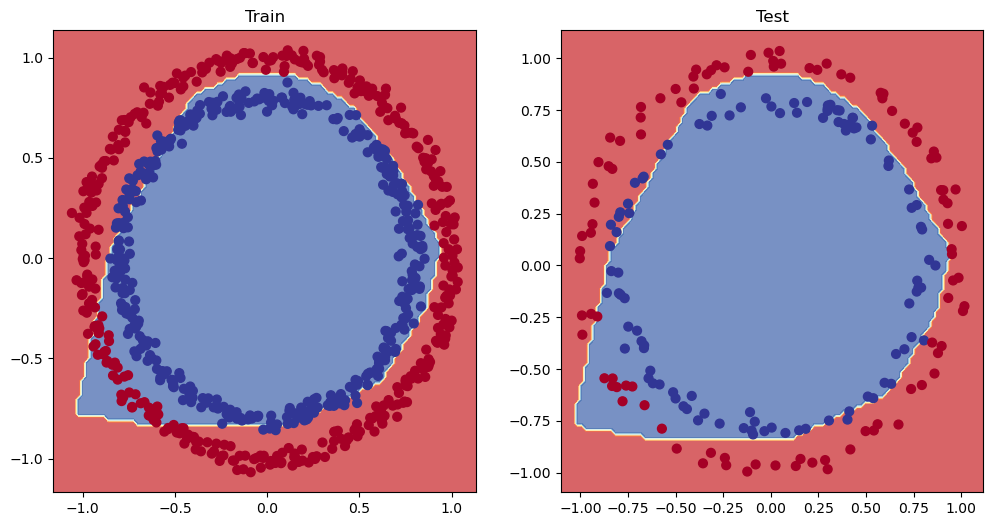

In [101]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replication non-linear activation functions
The model discover the right pattern and tries to figure it on its own


In [102]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6786,  0.8070],
                      [-0.1996,  0.7583],
                      [-0.1549,  0.1427],
                      [-0.9697,  0.2256],
                      [ 0.5689, -1.3488],
                      [ 0.6705,  0.1847],
                      [ 0.7998,  0.2619],
                      [ 0.3410, -0.0998],
                      [ 0.6571,  0.3207],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3755, -0.2028, -0.2872,  0.2796, -0.4520, -0.3361, -0.3301, -0.4252,
                      -0.2000, -0.6984])),
             ('layer_2.weight',
              tensor([[ 1.2976e-01, -3.7418e-01,  2.4414e-01, -4.4531e-02, -2.7374e-01,
                        1.0457e-01, -4.7809e-02,  2.5550e-01, -4.9883e-02, -9.9730e-02],
                      [ 7.9996e-01,  3.8634e-01,  1.3309e-01,  7.5991e-01,  9.7759e-01,
                        2.7272e-01,  6.2536e-01,  5.6581e-02,  5.3803e-01, -1.927

In [103]:
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

In [104]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

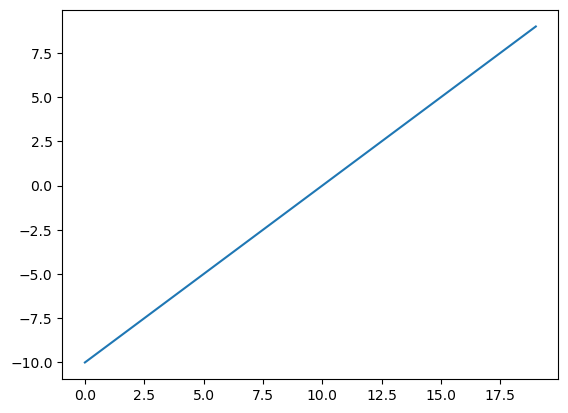

In [105]:
plt.plot(A)

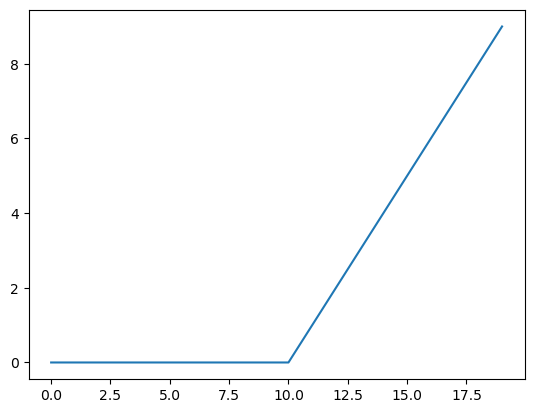

In [106]:
plt.plot(torch.relu(A))